## Hyperplane Estimation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [2]:
X_and_Y = torch.load('hyperplane-estimation.pt')
X1 = X_and_Y[:, 0].reshape(-1, 1)    # Shape: [900, 1]
X2 = X_and_Y[:, 1].reshape(-1, 1)    # Shape: [900, 1]
Y  = X_and_Y[:, 2].reshape(-1, 1)    # Shape: [900, 1]
print(X1.shape, X2.shape, Y.shape)

torch.Size([900, 1]) torch.Size([900, 1]) torch.Size([900, 1])


### Original Data

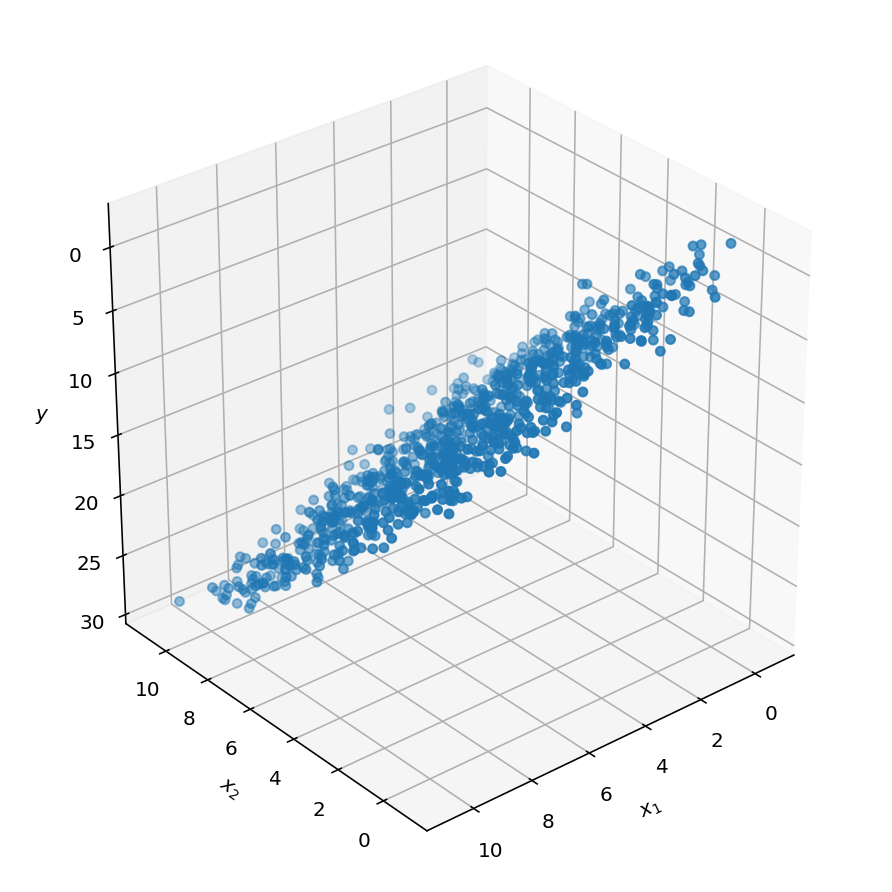

In [3]:
# Visualization.
def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    
    if draw_plane:
        num = 30
        X_plane_range = np.linspace(0,10,num)
        X_plane_range = np.linspace(0,10,num)
        X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
        Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

    fig = plt.figure(figsize = (6, 6))
    ax = Axes3D(fig, elev = -150, azim = 130)
    ax.scatter(X1.numpy(), X2.numpy(), Y.numpy())
    if draw_plane:
        ax.scatter(X1_plane, X2_plane, Y_plane)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    plt.show()
    
vis(None, None, None)

## 1.1

G(W) = (XW-Y)' * (XW-Y)

G(W) = W'X'XW - W'X'Y- Y'XW + Y'Y

dG(W)/dw = 2X'XW - 2 X'Y

## 1.2

W* = argmin(G(W))

dG(W)/dw = 2X'XW - 2 X'Y = 0

W = (X'X)^(-1) * X'Y

### Hyperplane Estimation Using the Closed Form Solution

Assume data points are represented as matrices $X$ and $Y$, please use the closed form solution to calculate the parameters $W$.

In [4]:
X = torch.cat([torch.ones((len(X1),1)), X1, X2], dim=1)    # X contains 1, X1 and X2.
#print (X.shape)    # torch.Size([900, 3])
#print (Y.shape)    # torch.Size([900, 1])

# Compute W using the closed form solution.
A = torch.inverse(torch.mm(X.T, X))
W = torch.mm(A, torch.mm(X.T, Y)) # Hint: In the form of X and Y.
#print (W.shape)    # torch.Size([3, 1])
w0, w1, w2 = W[0,0].numpy(), W[1,0].numpy(), W[2,0].numpy()
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))

y = -0.70 + 0.98*x1 + 1.94*x2


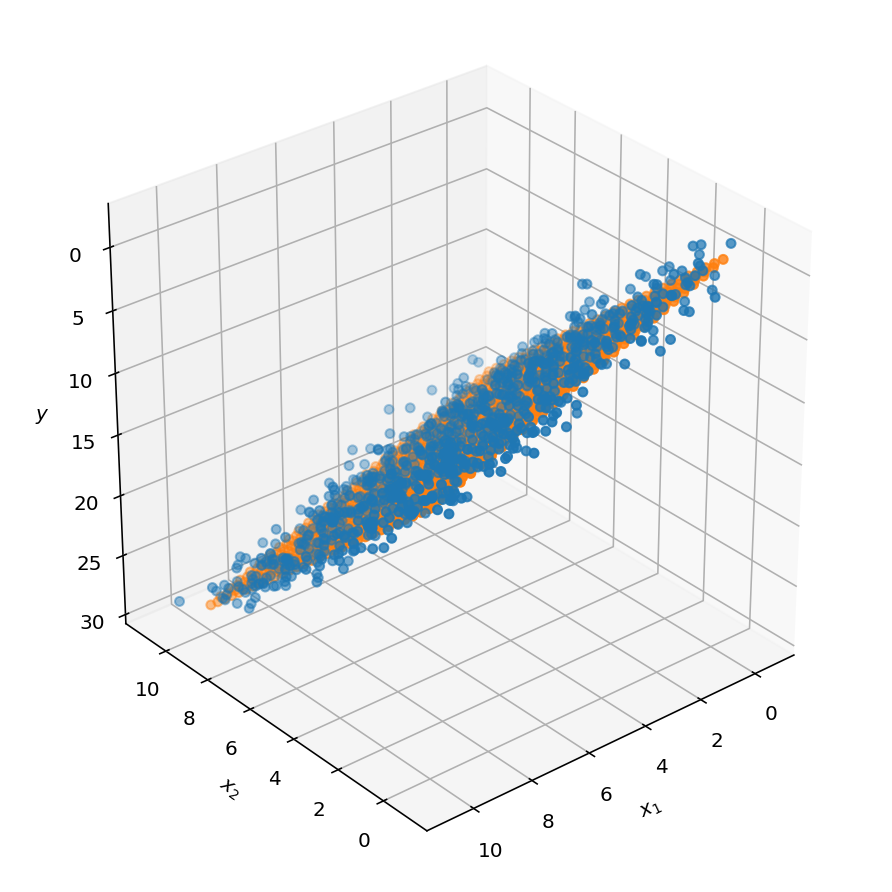

In [5]:
# Visualization.
vis(w0, w1, w2)

### Hyperplane Estimation Using Gradient Descent

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the hyperplane.
If we have an error function (a.k.a objective function or loss function), then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to #iterations:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow \mathcal{L}(W) = W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

In [6]:
# Gradient of L(W) with respect to W.
def grad_L_W(X, Y, W):
    return 2*(torch.mm(X.T, torch.mm(X,W)-Y))

In [7]:
# y=w0+w1*x1+w2*x2
# Some settings.
print(X.shape, Y.shape)    # torch.Size([900, 3]) torch.Size([900, 1])
iterations    = 20000
learning_rate = 0.000001

# Gradient descent algorithm.
# Step 1. Initialize the parameters W.
W = torch.zeros(3,1)

for i in range(iterations):
    # Step 2. Calculate the gradient of L(W) w.r.t. W. 
    grad = grad_L_W(X, Y, W)
    # Step 3. Update parameters W.
    W = W - learning_rate*grad####### To be filled #######  Hint: Use grad, W, learning_rate.

#w0, w1, w2 = np.array(W).reshape(-1)
w0, w1, w2 = W[0,0].numpy(), W[1,0].numpy(), W[2,0].numpy()
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))

torch.Size([900, 3]) torch.Size([900, 1])
y = -0.69 + 0.98*x1 + 1.94*x2


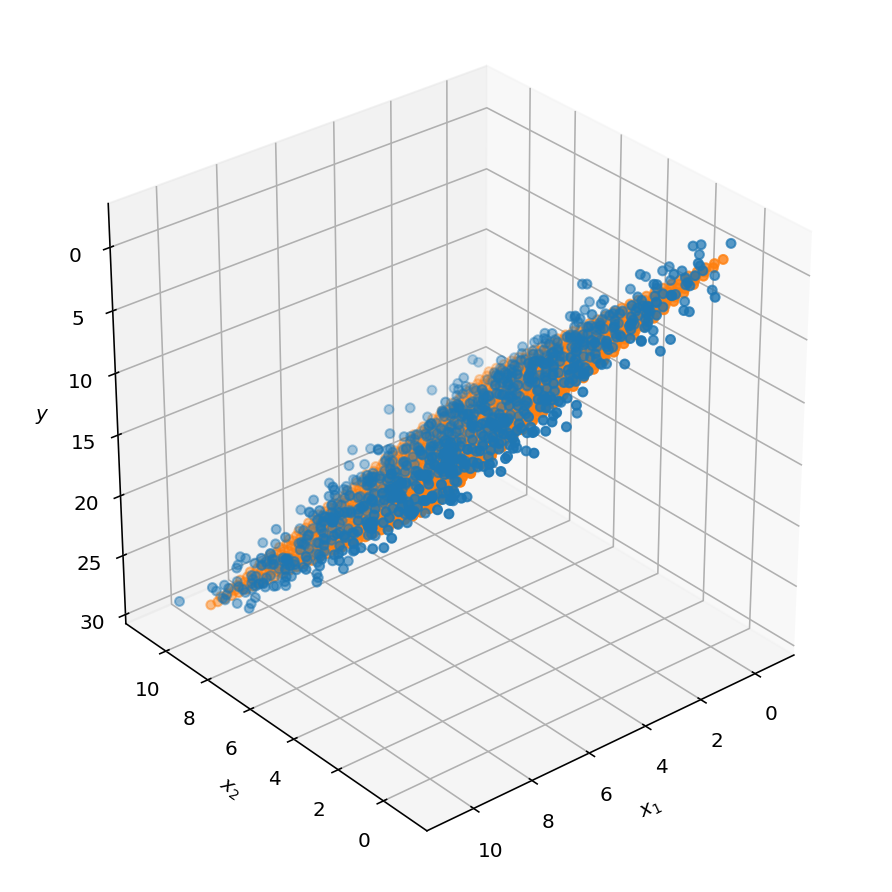

In [8]:
# Visualization.
vis(w0, w1, w2)